# TP2 Classification de voyelles par lois gaussiennes
NOM - PRÉNOM :

Déposer le notebook sur moodle à la fin de la séance.

### Vérification des données


In [84]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()
# Vérifier le contenu et la taille des matrices
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. TP1).
print(app_aa.shape)
print(app_ii.shape)
print(app_uu.shape)

(80, 2)
(80, 2)
(80, 2)


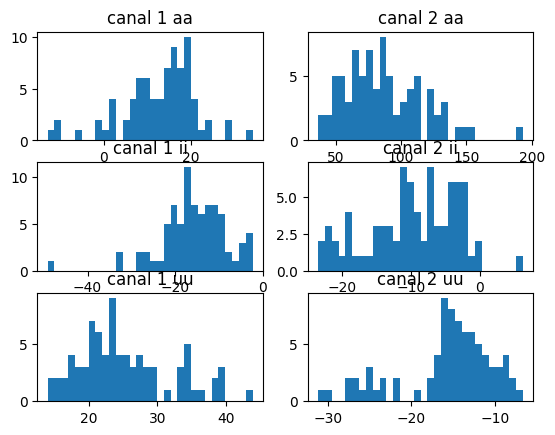

In [25]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace), 
# l'histograémme de chacune des classes : aa, uu et ii.
plt.subplot(3,2,1)
plt.hist(app_aa[:,0],bins=30)
plt.title("canal 1 aa")
plt.subplot(3,2,2)
plt.hist(app_aa[:,1],bins=30)
plt.title("canal 2 aa")
plt.subplot(3,2,3)
plt.hist(app_ii[:,0],bins=30)
plt.title("canal 1 ii")
plt.subplot(3,2,4)
plt.hist(app_ii[:,1],bins=30)
plt.title("canal 2 ii")
plt.subplot(3,2,5)
plt.hist(app_uu[:,0],bins=30)
plt.title("canal 1 uu")
plt.subplot(3,2,6)
plt.hist(app_uu[:,1],bins=30)
plt.title("canal 2 uu")
plt.show()
# Que pouvez-vous conclure ? Ecrire quelques lignes pour exppiquer
# On dirait plus ou moins des loi gaussienne


### Utilisation de lois gaussiennes

In [88]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe. 
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 
def estimer_param_gaussien(app):
    m = np.mean(app, axis=0)
    c = np.cov(app.T)
    return m, c

moy_aa, cov_aa = estimer_param_gaussien(app_aa)
moy_ii, cov_ii = estimer_param_gaussien(app_ii)
moy_uu, cov_uu = estimer_param_gaussien(app_uu)

liste_moy = [moy_aa,moy_ii,moy_uu]
liste_cov = [cov_aa,cov_ii,cov_uu]

In [89]:
#4- RECONNAISSANCE : écrire une fonction classer qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :

def classer(test,moy,cov):
    arg_min=np.inf
    sauv_no_classe=-1
    for no_classe in range(len(moy)):
        p = np.log(np.linalg.det(cov[no_classe])) + np.dot(np.dot((test - moy[no_classe]),np.linalg.inv(cov[no_classe])),(test - moy[no_classe]).T)
        if (p < arg_min):
            arg_min = p
            sauv_no_classe = no_classe+1
    return sauv_no_classe

In [90]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
# Vérifier leur dimensions et leur contenu
f = open('TST.pkl', 'rb')
dicoTEST = pickle.load(f)
test_aa = dicoTEST["aa"]
test_uu = dicoTEST["uu"]
test_ii = dicoTEST["ii"]
f.close()

In [91]:
print(classer(test_ii[5],liste_moy,liste_cov))
print(classer(test_aa[2],liste_moy,liste_cov))
print(classer(test_uu[7],liste_moy,liste_cov))

2
1
3


In [129]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification 
def tout_tester(listeTest,etiquette,moy,cov):
    predict=[]
    for test in listeTest:
        predict.append(classer(test,moy,cov))
    mat = confusion_matrix(etiquette,predict)
    score = 0
    for i in range(len(predict)):
        if predict[i] == etiquette[i]:
            score+=1
    score = score/len(predict)
    return mat, score, predict

def remplir_etiquette(nbClasse, nbParClasse):
    etiquette=[]
    for i in range(nbClasse):
        for j in range(nbParClasse):
            etiquette.append(i+1)
    return etiquette

In [130]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
liste = np.vstack((test_aa, test_ii, test_uu))

etiquette = remplir_etiquette(3,20)
mat,val,prediction = tout_tester(liste,etiquette,liste_moy,liste_cov)
print(mat,"\nScore :",val)

[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]] 
Score : 1.0


### Visualisation  des résultats

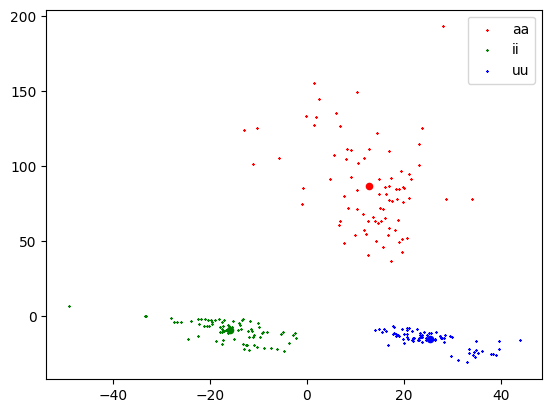

In [131]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant 
# aux données d'apprentissage

plt.scatter(app_aa[:,0], app_aa[:,1],s=1, c="r", label="aa", marker="x")
plt.scatter(app_ii[:,0], app_ii[:,1],s=1, c="g", label="ii", marker="x")
plt.scatter(app_uu[:,0], app_uu[:,1],s=1, c="b", label="uu", marker="x")

#10- Afficher les centroïdes des différentes classes.
plt.scatter(moy_aa[0], moy_aa[1],s=20, c="r")
plt.scatter(moy_ii[0], moy_ii[1],s=20, c="g")
plt.scatter(moy_uu[0], moy_uu[1],s=20, c="b")
plt.legend()
plt.show()

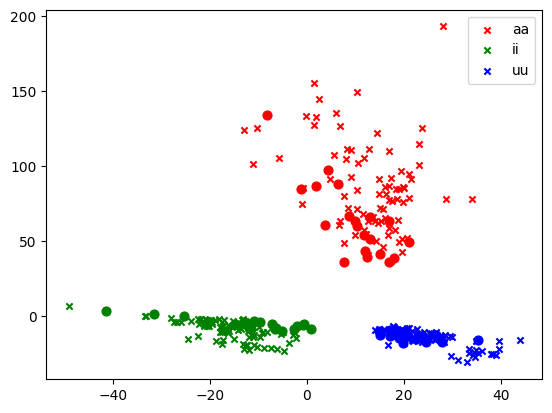

In [146]:
#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...).


couleur=["r","g","b"]
plt.scatter(app_aa[:,0], app_aa[:,1],s=20, c="r", label="aa", marker="x")
plt.scatter(app_ii[:,0], app_ii[:,1],s=20, c="g", label="ii", marker="x")
plt.scatter(app_uu[:,0], app_uu[:,1],s=20, c="b", label="uu", marker="x")
for i in range(len(liste)):
    plt.scatter(liste[i,0],liste[i,1], s=40,c=couleur[prediction[i]-1])
plt.legend()
plt.show()